<h1>MIDTERM EXAM: Chicago Crime Trends: 2024-2025 Data Analytics Project</h1>
<h3> ANALYST: Dwight Francis M. Caña</h3>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Chicago_Crimes.csv')

In [9]:
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [7]:
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [8]:
df.describe

<bound method NDFrame.describe of               ID Case Number                    Date                  Block  \
0       13439321    JH237424  04/14/2024 12:00:00 AM    040XX S PRAIRIE AVE   
1       13437420    JH234779  04/14/2024 12:00:00 AM      023XX W CERMAK RD   
2       13428676    JH224478  04/14/2024 12:00:00 AM    043XX W LE MOYNE ST   
3       13429357    JH225293  04/14/2024 12:00:00 AM       039XX W ADAMS ST   
4       13430098    JH226395  04/14/2024 12:00:00 AM       011XX W 112TH PL   
...          ...         ...                     ...                    ...   
249118  13805239    JJ217509  04/12/2025 12:00:00 AM     029XX W LOGAN BLVD   
249119  13804023    JJ215813  04/12/2025 12:00:00 AM    094XX S HARVARD AVE   
249120  13803926    JJ215943  04/12/2025 12:00:00 AM  084XX S VINCENNES AVE   
249121  13803475    JJ215338  04/12/2025 12:00:00 AM    050XX S ABERDEEN ST   
249122  13804512    JJ216668  04/12/2025 12:00:00 AM    012XX W CARROLL AVE   

        IUCR     

In [10]:
df.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

In [12]:
mode_loc = df['Location Description'].mode()[0]
df['Location Description'].fillna(mode_loc, inplace=True)

mode_dist = df['District'].mode()[0]
df['District'].fillna(mode_dist, inplace=True)

mode_area = df['Community Area'].mode()[0]
df['Community Area'].fillna(mode_area, inplace=True)

mean_x = df['X Coordinate'].mean()
df['X Coordinate'].fillna(mean_x, inplace=True)

mean_y = df['Y Coordinate'].mean()
df['Y Coordinate'].fillna(mean_y, inplace=True)

mean_lat = df['Latitude'].mean()
df['Latitude'].fillna(mean_lat, inplace=True)

mean_lon = df['Longitude'].mean()
df['Longitude'].fillna(mean_lon, inplace=True)

df['Location'].fillna('Unknown', inplace=True)

df.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [13]:
df['ID'] = df['ID'].astype('int')
df['Case Number'] = df['Case Number'].astype('string')
df['Date'] = df['Date'].astype('str')
df['Date'] = df['Date'].str.replace('/', '-')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Block'] = df['Block'].astype('string')
df['IUCR'] = df['IUCR'].astype('string')
df['Primary Type'] = df['Primary Type'].astype('string')
df['Description'] = df['Description'].astype('string')
df['Location Description'] = df['Location Description'].astype('string')
df['Arrest'] = df['Arrest'].astype('bool')
df['Domestic'] = df['Domestic'].astype('bool')
df['Beat'] = df['Beat'].astype('int')
df['District'] = df['District'].astype('int')
df['Ward'] = df['Ward'].astype('int')
df['Community Area'] = df['Community Area'].astype('int')
df['FBI Code'] = df['FBI Code'].astype('string')
df['X Coordinate'] = df['X Coordinate'].astype('float')
df['Y Coordinate'] = df['Y Coordinate'].astype('float')
df['Year'] = df['Year'].astype('int')
df['Updated On'] = pd.to_datetime(df['Updated On'], dayfirst=True, errors='coerce')
df['Latitude'] = df['Latitude'].astype('float')
df['Longitude'] = df['Longitude'].astype('float')
df['Location'] = df['Location'].astype('string')

In [14]:
# extract parts of the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day
df['Week'] = df['Date'].dt.isocalendar().week
df['Day_Name'] = df['Date'].dt.day_name()
df['Hour'] = df['Date'].dt.hour

hour_labels = {
    0: "12 AM", 1: "1 AM", 2: "2 AM", 3: "3 AM", 4: "4 AM", 5: "5 AM",
    6: "6 AM", 7: "7 AM", 8: "8 AM", 9: "9 AM", 10: "10 AM", 11: "11 AM",
    12: "12 PM", 13: "1 PM", 14: "2 PM", 15: "3 PM", 16: "4 PM", 17: "5 PM",
    18: "6 PM", 19: "7 PM", 20: "8 PM", 21: "9 PM", 22: "10 PM", 23: "11 PM"
}
df['Hour_Label'] = df['Hour'].map(hour_labels)

df[['Date', 'Year', 'Month', 'Month_Name', 'Day', 'Week', 'Day_Name', 'Hour', 'Hour_Label']].head()

,Date,Year,Month,Month_Name,Day,Week,Day_Name,Hour,Hour_Label
0,2024-04-14,2024,4,April,14,15,Sunday,0,12 AM
1,2024-04-14,2024,4,April,14,15,Sunday,0,12 AM
2,2024-04-14,2024,4,April,14,15,Sunday,0,12 AM
3,2024-04-14,2024,4,April,14,15,Sunday,0,12 AM
4,2024-04-14,2024,4,April,14,15,Sunday,0,12 AM


<hr>
<h2 style= "color:yellow">Data Analysis Questions</h2>

<h3>1. What type of crime is the most common?</h3>

In [17]:
df['Primary Type'].value_counts()

Primary Type
THEFT                                59201
BATTERY                              44579
CRIMINAL DAMAGE                      27094
ASSAULT                              22615
MOTOR VEHICLE THEFT                  19604
OTHER OFFENSE                        16781
DECEPTIVE PRACTICE                   14991
BURGLARY                              8443
ROBBERY                               8200
WEAPONS VIOLATION                     7164
NARCOTICS                             6627
CRIMINAL TRESPASS                     5045
OFFENSE INVOLVING CHILDREN            1597
CRIMINAL SEXUAL ASSAULT               1573
SEX OFFENSE                           1210
PUBLIC PEACE VIOLATION                1006
INTERFERENCE WITH PUBLIC OFFICER       771
HOMICIDE                               553
STALKING                               520
ARSON                                  452
PROSTITUTION                           287
CONCEALED CARRY LICENSE VIOLATION      249
LIQUOR LAW VIOLATION                   19

<h4> No.1 insght:</h4>
<p> The most common being theif making sense as it is a intention crime to benefit oneselves</p>
<hr>

<h4> No.2 insght:</h4>
<p> following up with bettery and criminal damage, which go complimentary with other crimes. but most offend than not is due to irrational causes</p>
<hr>

<h4> No.3 insght:</h4>
<p> the amount of battery compared to assult means most act of assult tend too escalate</p>
<hr>

<h3>2. Where is theft the most common?</h3>

In [22]:
tdf=df[df['Primary Type'] == "THEFT"]
tdf['Location Description'].value_counts()

Location Description
STREET                       13185
APARTMENT                     7513
SMALL RETAIL STORE            6680
DEPARTMENT STORE              4726
RESIDENCE                     4350
                             ...  
FARM                             2
CEMETARY                         1
POOL ROOM                        1
CTA TRACKS - RIGHT OF WAY        1
CREDIT UNION                     1
Name: count, Length: 100, dtype: Int64

<h4> No.4 insght:</h4>
<p> Street theft is the common as it simply relies on your physical ability to run away after snatching smth, compared to residential areas or stores where it can be more dangerous.</p>
<hr>

<h3>3. what time in the day where theft happens</h3>

In [25]:
def time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

tdf['Time_of_Day'] = tdf['Hour'].apply(time_of_day)

time_table = (tdf['Time_of_Day']
              .value_counts(normalize=True)
              .mul(100)
              .round(1)
              .astype(str) + '%')

time_table.to_frame(name='theft most active')

,theft most active
Time_of_Day,
Afternoon,31.6%
Morning,23.5%
Night,22.6%
Evening,22.3%


<h4> No.5 insght:</h4>
<p> theft is most active during the afternoon as it makes sense since its the tiime where most people are on the street for lunch or a break</p>
<hr>

<h4> No.6 insght:</h4>
<p> all others times are relatively the same so anytime of the day you can be a victim of theft</p>
<hr>

<h3>4. What usually get stolen during a theft</h3>

In [30]:
robbery_counts = tdf['Description'].value_counts().head(10)

robbery_percent = round((robbery_counts / robbery_counts.sum()) * 100, 2).astype(str) + '%'

robbery_table = pd.DataFrame({
    'Count': robbery_counts,
    'Percentage': robbery_percent
})

robbery_table

,Count,Percentage
Description,,
$500 AND UNDER,17963,30.34%
OVER $500,16572,27.99%
RETAIL THEFT,14053,23.74%
FROM BUILDING,4941,8.35%
THEFT FROM MOTOR VEHICLE,3701,6.25%
POCKET-PICKING,1301,2.2%
ATTEMPT THEFT,349,0.59%
PURSE-SNATCHING,263,0.44%
DELIVERY CONTAINER THEFT,43,0.07%


<h4> No.7 insght:</h4>
<p> most commonly is money more likely being under 500$. with the idea of "they wont notice a couple dollars missing right?"</p>
<hr>

<h4> No.8 insght:</h4>
<p> retail theft and from building being the next common which is usually shoplifting.</p>
<hr>

<h4> No.9 insght:</h4>
<p> the least common is coin operated machine as it contains mostly coins and usually in public and open spaces which isnt ideal for theifs. With delivery container theft where homes usaually got cameras or some other kind of security</p>
<hr>

<h3>5. Cases of theft during 2024 and 2025</h3>

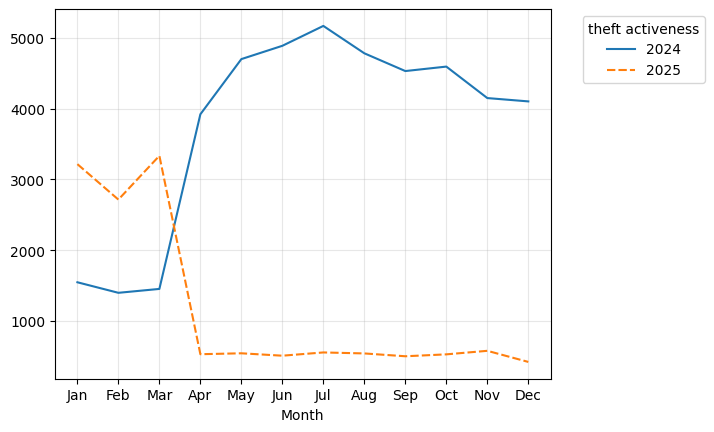

In [35]:
mm2 = tdf.groupby(['Year', 'Month']).size().unstack(level=0)
sns.lineplot(data=mm2)
  
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='theft activeness', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h4> No.10 insght:</h4>
<p> the cases between 2024 and 2025 seems to significatly decrease. </p>
<hr>

<h4> No.11 insght:</h4>
<p> the cases during march of 2024 had a massive spike and continous flow till suddenly dropping at the same month during 2025. lack of info to provide cause</p>
<hr>

<h3>6. Do theft get arrested?</h3>

In [45]:
ccc = tdf['Arrest'].value_counts().head(10)

cp = round((ccc / ccc.sum()) * 100, 2).astype(str) + '%'

arrsestiftheft = pd.DataFrame({
    'Count': ccc,
    'Percentage': cp
})

arrsestiftheft

,Count,Percentage
Arrest,,
False,54672,92.35%
True,4529,7.65%


<h4> No.12 insght:</h4>
<p> most theft cases arent arrested which follow-up investigation would cause more if the initial chase dint resolve it immidieatly.</p>
<hr>

<h4> No.13 insght:</h4>
<p> As probably why its the most common crime as people do get a way with it</p>
<hr>

<h4> No.14 insght:</h4>
<p> getting arested with 10% chance will probaly make people want to do it again. they will get caught eventually but the longer it takes the more skillful the criminal will be after each case </p>
<hr>

<h3>6. The top 5 commited in different regions relatively</h3>

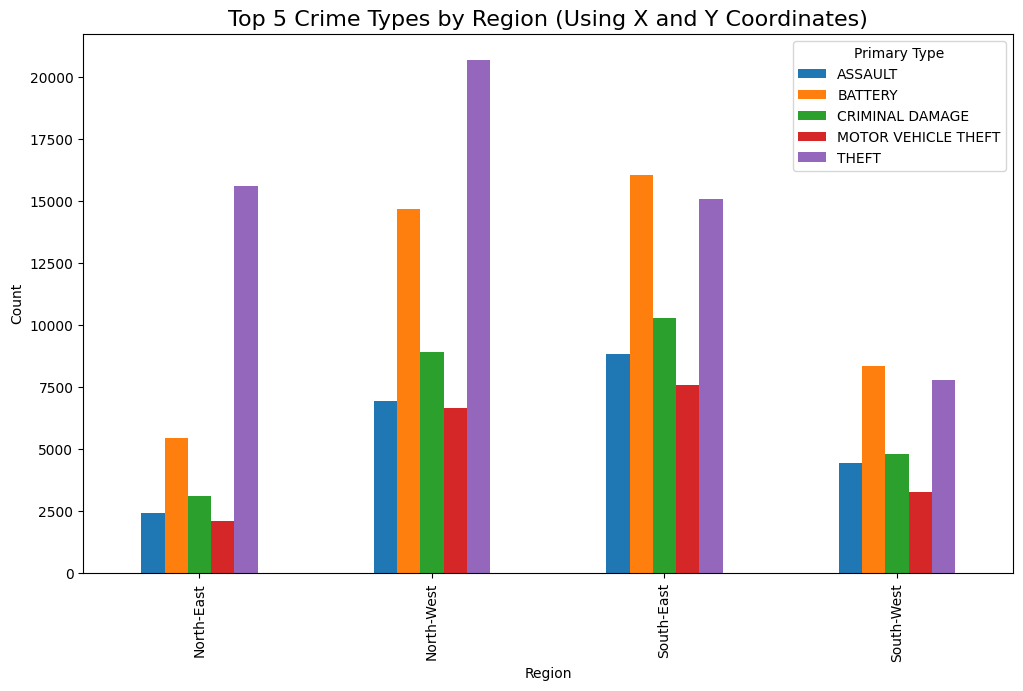

In [46]:
top_types = df['Primary Type'].value_counts().head(5).index
subset_df = df[df['Primary Type'].isin(top_types)].dropna(subset=['X Coordinate','Y Coordinate'])

x_median = subset_df['X Coordinate'].median()
y_median = subset_df['Y Coordinate'].median()

conditions = [
    (subset_df['X Coordinate'] >= x_median) & (subset_df['Y Coordinate'] >= y_median),
    (subset_df['X Coordinate'] < x_median) & (subset_df['Y Coordinate'] >= y_median),
    (subset_df['X Coordinate'] >= x_median) & (subset_df['Y Coordinate'] < y_median),
    (subset_df['X Coordinate'] < x_median) & (subset_df['Y Coordinate'] < y_median)
]

region_names = ['North-East', 'North-West', 'South-East', 'South-West']
subset_df['Region'] = np.select(conditions, region_names, default='Unknown')

region_crime_counts = subset_df.groupby(['Region','Primary Type']).size().unstack().fillna(0)

region_crime_counts.plot(kind='bar', figsize=(12,7))
plt.title("Top 5 Crime Types by Region (Using X and Y Coordinates)", fontsize=16)
plt.xlabel("Region")
plt.ylabel("Count")
plt.legend(title="Primary Type")
plt.show()

<h4> No.15 insght:</h4>
<p> Theft being the most common except in the SW and SE may be due to better living conditions or better security from the law or personal practices</p>
<hr>

<h4> No.16 insght:</h4>
<p> Theft being the primary crime in the NE where the other 4 even all added together doesnt compare to the amounth of theft happening. which can be good as it is usally a less violent crime. but can be connected to the regions living conditon like lack of work and resorting to theft to survive </p>
<hr>

<h4> No.17 insght:</h4>
<p> Cases in the NW having more overall compared to all region may be a sign for the government to take a look of a deeper problem </p>
<hr>

<h3>6. Which crime type has the highest arrest rate?</h3>

In [56]:

arrest_rate = df.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False).head(10)
arrest_rate

Primary Type
GAMBLING                             1.000000
CONCEALED CARRY LICENSE VIOLATION    0.987952
LIQUOR LAW VIOLATION                 0.968750
NARCOTICS                            0.958352
PROSTITUTION                         0.951220
PUBLIC INDECENCY                     0.923077
INTERFERENCE WITH PUBLIC OFFICER     0.894942
NON-CRIMINAL                         0.750000
WEAPONS VIOLATION                    0.648520
OBSCENITY                            0.528302
Name: Arrest, dtype: float64

<h4> No.18 insght:</h4>
<p> gambling cases being guranteed arrest making sense as legal gambling is not usually reported and only if its properly investigated does is get called for attention and the illegal ones is hard to cover up </p>
<hr>

<h4> No.19 insght:</h4>
<p> most most concealed carry not having their licence on them would lead to arrest. if they were license to begin with</p>
<hr>

<h3>7. the top 5 crimes during the week</h3>

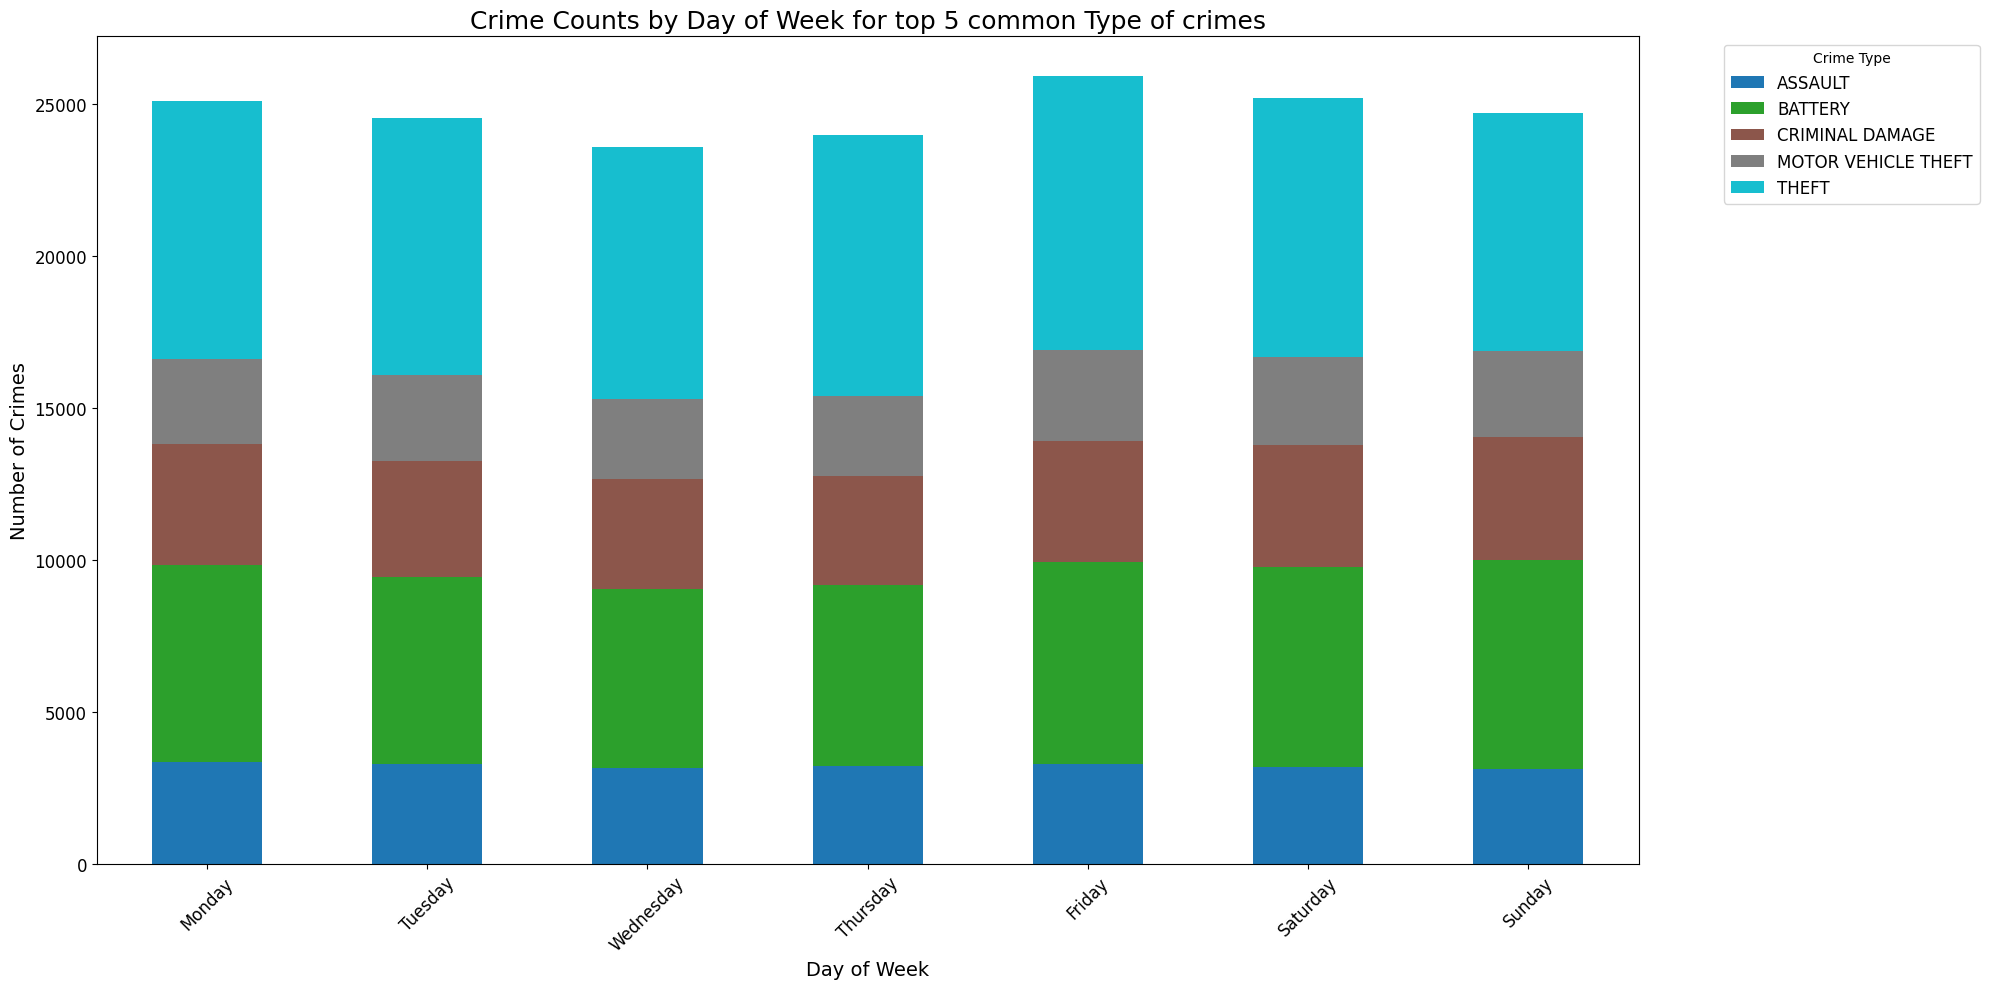

In [60]:
df = df[['Primary Type', 'Date']]
df['Date'] = pd.to_datetime(df['Date'])
df['Day_Name'] = df['Date'].dt.day_name()

selected_crimes = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSAULT', 'BURGLARY', 'ROBBERY']
df = df[df['Primary Type'].isin(selected_crimes)]

# Aggregate counts by day and crime type
counts = subset_df.groupby(['Day_Name', 'Primary Type']).size().unstack(fill_value=0)
counts = counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot stacked bar
counts.plot(kind='bar', stacked=True, figsize=(20, 10), colormap='tab10')

plt.title('Crime Counts by Day of Week for top 5 common Type of crimes', fontsize=18)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

<h4> No.20 insght:</h4>
<p> with theft and motor theft being the most common crime. makes sense as the criminal is gaining smth from it</p>
<hr>

<h4> No.21 insght:</h4>
<p> crime being most active during friday. may be due to built up stress during the weekdays? or most people being less attentive during friday</p>
<hr>

<h3>8. Where is theft the most common? but visualized~</h3>

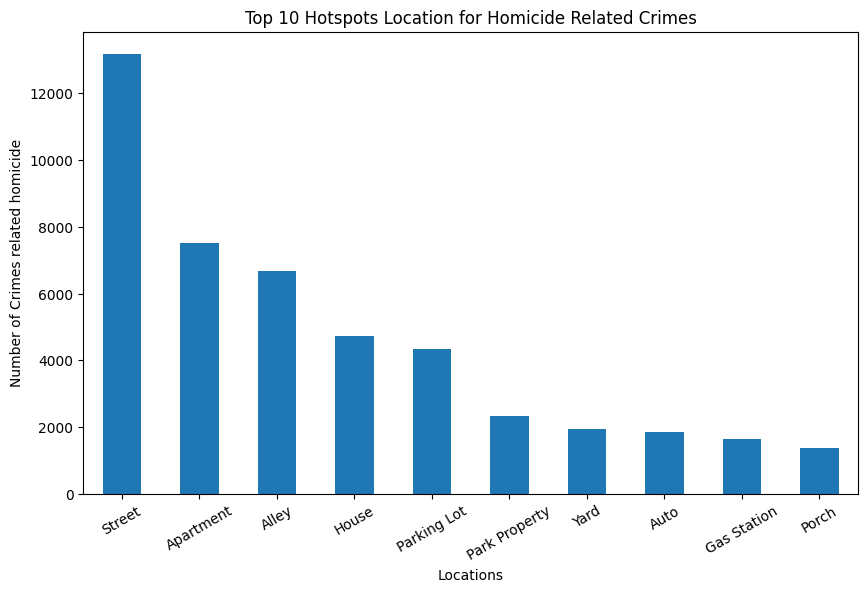

In [62]:


chicago_hteft = tdf["Location Description"].value_counts().head(10)

chicago_hteft

labelss = ["Street", "Apartment", "Alley", "House", "Parking Lot", "Park Property", 
          "Yard", "Auto", "Gas Station", "Porch"]

chicago_hteft.plot(kind='bar', figsize=(10,6) )
plt.xlabel('Locations')
plt.ylabel('Number of Crimes related homicide')
plt.title('Top 10 location for theft')
plt.xticks(ticks=range(0,10), labels=labelss, rotation=30)
plt.show()

<h4> No.22 insght:</h4>
<p> Street theft being the most common by a decent margin compared to appartment followed up by alley then house</p>
<hr>

<h4> No.23 insght:</h4>
<p> Alley suprisingly in the middle of actually homes instead of being 2nd overall as alley are quite secure to steal and you spect crimes to happen</p>
<hr>